<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/Ara_Proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "drive/MyDrive/2017"
files = list()

In [5]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
        

In [6]:
len_files = len(files)

In [7]:
len_under_10 = 0
len_over_130 = 0

for i in range(len_files):
  df = pd.read_csv(files[i])
  if df["1"].min() < 10:
    len_under_10 += 1
  if df["1"].max() > 130:
    len_over_130 += 1
  print("over 130: ", len_over_130)
  print("i: ",i)
  

over 130:  1
i:  0
over 130:  2
i:  1
over 130:  2
i:  2
over 130:  3
i:  3
over 130:  4
i:  4
over 130:  4
i:  5
over 130:  4
i:  6
over 130:  4
i:  7
over 130:  4
i:  8
over 130:  4
i:  9
over 130:  4
i:  10
over 130:  5
i:  11
over 130:  6
i:  12
over 130:  6
i:  13
over 130:  7
i:  14
over 130:  8
i:  15
over 130:  9
i:  16
over 130:  9
i:  17
over 130:  10
i:  18
over 130:  11
i:  19
over 130:  12
i:  20
over 130:  12
i:  21
over 130:  13
i:  22
over 130:  13
i:  23
over 130:  13
i:  24
over 130:  13
i:  25
over 130:  13
i:  26
over 130:  13
i:  27
over 130:  13
i:  28
over 130:  13
i:  29
over 130:  14
i:  30
over 130:  15
i:  31
over 130:  15
i:  32
over 130:  15
i:  33
over 130:  15
i:  34
over 130:  16
i:  35
over 130:  16
i:  36
over 130:  16
i:  37
over 130:  17
i:  38
over 130:  18
i:  39
over 130:  19
i:  40
over 130:  20
i:  41
over 130:  20
i:  42
over 130:  21
i:  43
over 130:  22
i:  44
over 130:  23
i:  45
over 130:  23
i:  46
over 130:  24
i:  47
over 130:  25
i:  48

In [8]:
len_over_130

886

In [9]:
len_under_10

1656

In [10]:
percentage_over_130 = (len_over_130/len_files)*100
percentage_under_10 = (len_under_10/len_files)*100

In [11]:
percentage_over_130

53.5024154589372

In [12]:
percentage_under_10

100.0

In [13]:
file_info = pd.DataFrame(columns=["under_10","over_130","percentage_under_10","percentage_over_130"])

In [15]:
df = pd.read_csv(files[0])
len_file = len(df)

In [17]:
for i in range(len_files):
  df = pd.read_csv(files[i]) 
  file_info.loc[files[i]] = [1 if df["1"].min() < 10 else 0,
                        1 if df["1"].max() > 130 else 0,
                        (len(df["1"][df["1"] < 10]) / len_file) *100,
                        (len(df["1"][df["1"] > 130]) / len_file) *100]
  
  print("i: ",i)

i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
i:  41
i:  42
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49
i:  50
i:  51
i:  52
i:  53
i:  54
i:  55
i:  56
i:  57
i:  58
i:  59
i:  60
i:  61
i:  62
i:  63
i:  64
i:  65
i:  66
i:  67
i:  68
i:  69
i:  70
i:  71
i:  72
i:  73
i:  74
i:  75
i:  76
i:  77
i:  78
i:  79
i:  80
i:  81
i:  82
i:  83
i:  84
i:  85
i:  86
i:  87
i:  88
i:  89
i:  90
i:  91
i:  92
i:  93
i:  94
i:  95
i:  96
i:  97
i:  98
i:  99
i:  100
i:  101
i:  102
i:  103
i:  104
i:  105
i:  106
i:  107
i:  108
i:  109
i:  110
i:  111
i:  112
i:  113
i:  114
i:  115
i:  116
i:  117
i:  118
i:  119
i:  120
i:  121
i:  122
i:  123
i:  124
i:  125
i:  126
i:  127
i:  128
i:  129
i:  130
i:  131
i:  132
i:  133
i:  134
i:  135
i:  136
i:  137
i:  13

In [18]:
file_info.describe()

,under_10,over_130,percentage_under_10,percentage_over_130
count,1656.0,1656.000000,1656.000000,1656.000000
mean,1.0,0.535024,13.768251,0.130745
std,0.0,0.498922,15.867463,0.711467
min,1.0,0.000000,3.184932,0.000000
25%,1.0,0.000000,3.611587,0.000000
50%,1.0,1.000000,7.294996,0.000951
75%,1.0,1.000000,17.761606,0.031393
max,1.0,1.000000,100.000000,12.247907


In [19]:
file_info

,under_10,over_130,percentage_under_10,percentage_over_130
drive/MyDrive/2017/642_0_2017.csv,1.0,1.0,5.039954,0.122717
drive/MyDrive/2017/1889_0_2017.csv,1.0,1.0,3.224886,0.002854
drive/MyDrive/2017/588_1_2017.csv,1.0,0.0,5.203577,0.000000
drive/MyDrive/2017/629_0_2017.csv,1.0,1.0,4.140030,0.201674
drive/MyDrive/2017/1890_0_2017.csv,1.0,1.0,3.224886,0.002854
...,...,...,...,...
drive/MyDrive/2017/257_0_2017.csv,1.0,1.0,4.576674,0.000951
drive/MyDrive/2017/55_1_2017.csv,1.0,1.0,4.052511,0.004756
drive/MyDrive/2017/333_1_2017.csv,1.0,1.0,3.648212,0.013318
drive/MyDrive/2017/588_0_2017.csv,1.0,0.0,5.184551,0.000000


In [40]:
trash_files = list((file_info[file_info["percentage_under_10"]>=30]).index)

In [41]:
trash_files

['drive/MyDrive/2017/918_1_2017.csv',
 'drive/MyDrive/2017/918_0_2017.csv',
 'drive/MyDrive/2017/926_1_2017.csv',
 'drive/MyDrive/2017/927_1_2017.csv',
 'drive/MyDrive/2017/925_1_2017.csv',
 'drive/MyDrive/2017/919_0_2017.csv',
 'drive/MyDrive/2017/919_1_2017.csv',
 'drive/MyDrive/2017/928_1_2017.csv',
 'drive/MyDrive/2017/929_0_2017.csv',
 'drive/MyDrive/2017/1731_0_2017.csv',
 'drive/MyDrive/2017/924_1_2017.csv',
 'drive/MyDrive/2017/923_1_2017.csv',
 'drive/MyDrive/2017/920_1_2017.csv',
 'drive/MyDrive/2017/922_1_2017.csv',
 'drive/MyDrive/2017/925_0_2017.csv',
 'drive/MyDrive/2017/924_0_2017.csv',
 'drive/MyDrive/2017/921_1_2017.csv',
 'drive/MyDrive/2017/928_0_2017.csv',
 'drive/MyDrive/2017/921_0_2017.csv',
 'drive/MyDrive/2017/923_0_2017.csv',
 'drive/MyDrive/2017/920_0_2017.csv',
 'drive/MyDrive/2017/1776_1_2017.csv',
 'drive/MyDrive/2017/926_0_2017.csv',
 'drive/MyDrive/2017/922_0_2017.csv',
 'drive/MyDrive/2017/541_1_2017.csv',
 'drive/MyDrive/2017/305_0_2017.csv',
 'drive/My

In [60]:
len(trash_files)

188

In [21]:
file_info.sort_values("percentage_under_10",ascending=False)[:85]

,under_10,over_130,percentage_under_10,percentage_over_130
drive/MyDrive/2017/926_1_2017.csv,1.0,0.0,100.000000,0.000000
drive/MyDrive/2017/929_0_2017.csv,1.0,0.0,100.000000,0.000000
drive/MyDrive/2017/926_0_2017.csv,1.0,0.0,100.000000,0.000000
drive/MyDrive/2017/928_0_2017.csv,1.0,0.0,100.000000,0.000000
drive/MyDrive/2017/921_1_2017.csv,1.0,0.0,100.000000,0.000000
...,...,...,...,...
drive/MyDrive/2017/528_0_2017.csv,1.0,0.0,39.430175,0.000000
drive/MyDrive/2017/1194_0_2017.csv,1.0,0.0,38.975457,0.000000
drive/MyDrive/2017/2109_0_2017.csv,1.0,1.0,38.747146,0.015221
drive/MyDrive/2017/1052_0_2017.csv,1.0,1.0,38.539764,0.001903


In [28]:
file_info.sort_values("percentage_over_130",ascending=False)

,under_10,over_130,percentage_under_10,percentage_over_130
drive/MyDrive/2017/1730_0_2017.csv,1.0,1.0,14.421613,12.247907
drive/MyDrive/2017/1730_1_2017.csv,1.0,1.0,16.946347,10.472793
drive/MyDrive/2017/190_1_2017.csv,1.0,1.0,18.028919,10.374810
drive/MyDrive/2017/649_1_2017.csv,1.0,1.0,43.655822,9.494863
drive/MyDrive/2017/648_1_2017.csv,1.0,1.0,41.230023,7.578957
...,...,...,...,...
drive/MyDrive/2017/532_0_2017.csv,1.0,0.0,35.232116,0.000000
drive/MyDrive/2017/1041_1_2017.csv,1.0,0.0,34.065830,0.000000
drive/MyDrive/2017/2056_0_2017.csv,1.0,0.0,30.993151,0.000000
drive/MyDrive/2017/9_0_2017.csv,1.0,0.0,12.906202,0.000000


In [42]:
import seaborn as sns

In [56]:
df = pd.read_csv(trash_files[-15])

In [57]:
df.describe()

,1
count,105120.000000
mean,23.088752
std,20.329456
min,-1.000000
25%,-1.000000
50%,25.250000
75%,39.000000
max,100.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


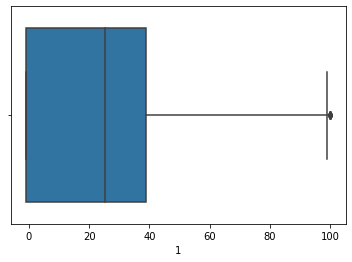

In [58]:
sns.boxplot(df["1"])


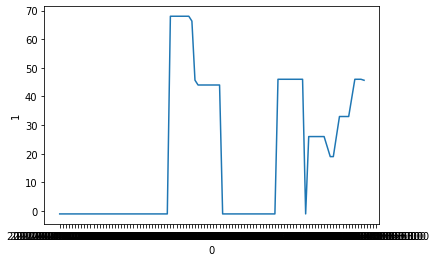

In [59]:
sns.lineplot(y=df["1"][:100],x=df["0"][:288])

In [61]:
proper_files = list(set(files) - set(trash_files))

In [70]:
for file_name in proper_files:
  df = pd.read_csv(file_name)
  file_name_split = file_name.split("/")
  df.to_csv("drive/MyDrive/2017_v1/"+file_name_split[-1],index=False)